<a href="https://colab.research.google.com/github/sumitrathore111/main.py/blob/main/Predicting_House_price_Linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/housing.csv"  # Replace with your actual file path
data = pd.read_csv("/content/housing.csv")

# View the first few rows
print(data.head())


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [40]:
# Basic info about the data
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Statistical summary
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
       Avg. Area Income  Avg. Area House Age  Avg. Ar


Comparison of Actual vs Predicted Prices:
      Actual Price  Predicted Price
398   8.942511e+05     9.696083e+05
3833  9.329794e+05     9.538682e+05
4836  9.207479e+05     9.075063e+05
4572  6.918549e+05     4.933253e+05
636   7.327332e+05     7.182212e+05
...            ...              ...
4554  1.900789e+06     1.708751e+06
4807  1.630435e+06     1.585405e+06
1073  1.372994e+06     1.423701e+06
2906  7.707706e+05     7.444009e+05
1357  5.292821e+05     4.885258e+05

[1500 rows x 2 columns]


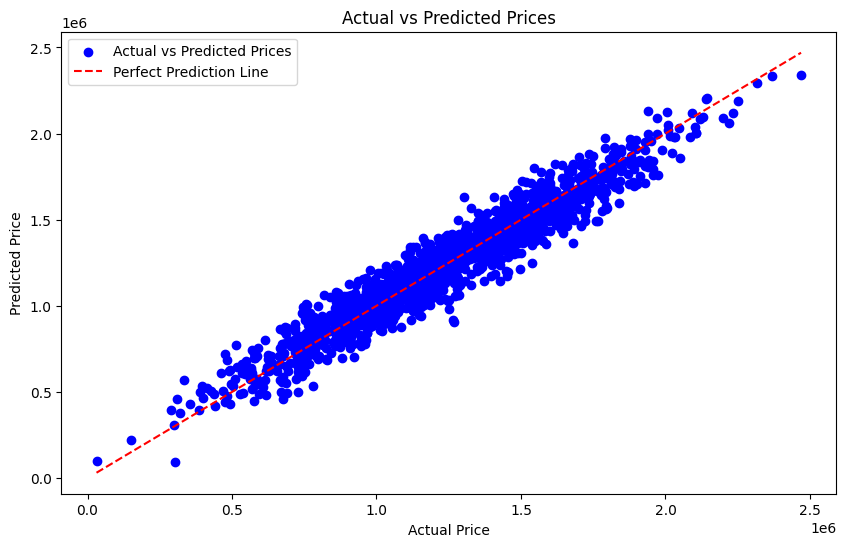

MAE: 81563.14732603623, MSE: 10337337827.049212, R2: 0.9200757649506057


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/content/housing.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)


# Prepare the data
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
          'Avg. Area Number of Bedrooms', 'Area Population']]  # Features
y = data['Price']  # Target variable

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Make predictions using the test set
y_pred = regressor.predict(X_test_scaled)

# Show actual vs predicted price comparison
comparison = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})
print("\nComparison of Actual vs Predicted Prices:")
print(comparison)

# Visualization of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")


In [46]:
# New data (for example)
new_data = pd.DataFrame({
    'Avg. Area Income': [65000, 72000],
    'Avg. Area House Age': [5.5, 6.1],
    'Avg. Area Number of Rooms': [7.0, 8.5],
    'Avg. Area Number of Bedrooms': [4.0, 3.5],
    'Area Population': [30000, 35000]
})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions on the new data
new_predictions = regressor.predict(new_data_scaled)

# Display predictions
for i, price in enumerate(new_predictions):
    print(f"Predicted Price for data point {i+1}: ${price:,.2f}")

Predicted Price for data point 1: $983,285.55
Predicted Price for data point 2: $1,490,763.65
